<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as npQ
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]  # Random image of a kitten

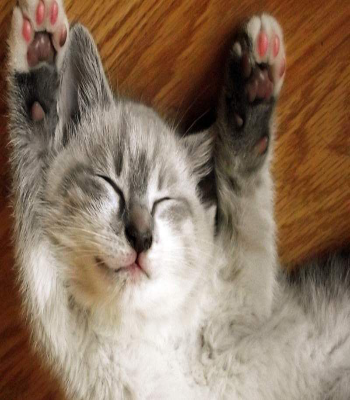

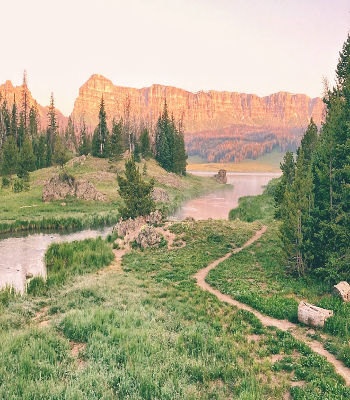

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
images

[array([[[ 26,  61, 118],
         [ 33,  70, 126],
         [ 30,  69, 123],
         ...,
         [ 19,  58, 110],
         [ 16,  55, 107],
         [ 17,  56, 108]],
 
        [[ 33,  72, 127],
         [ 36,  75, 130],
         [ 30,  70, 123],
         ...,
         [ 18,  57, 109],
         [ 16,  55, 107],
         [ 17,  56, 108]],
 
        [[ 35,  76, 131],
         [ 31,  72, 127],
         [ 25,  66, 118],
         ...,
         [ 15,  53, 107],
         [ 14,  52, 106],
         [ 15,  53, 107]],
 
        ...,
 
        [[ 10,  28,  65],
         [  8,  26,  63],
         [  5,  23,  60],
         ...,
         [115, 125, 135],
         [104, 114, 124],
         [ 95, 105, 115]],
 
        [[  6,  25,  59],
         [  7,  25,  59],
         [  8,  27,  61],
         ...,
         [107, 117, 127],
         [102, 112, 122],
         [103, 114, 123]],
 
        [[  8,  26,  57],
         [  8,  26,  57],
         [ 11,  28,  61],
         ...,
         [105, 115, 125],
  

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

In [ ]:
gray = grayscale(images[0])

In [ ]:
gray2 = grayscale(images[1])

# 1. Binarize an image

In [ ]:
def binarize(image, threshold, num_1, num_2):
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(0,R):
    for j in range(0,C):
      if(image[i][j] > threshold):
        image_2[i][j] = num_1
      else:
        image_2[i][j]= num_2
  cv2_imshow(image_2)


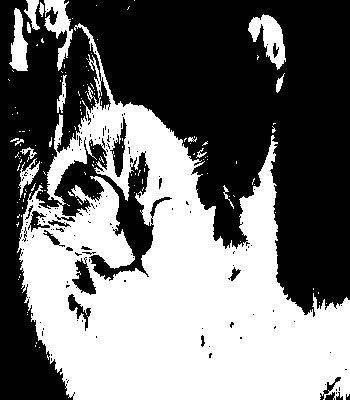

In [ ]:
binarize(gray, 128, 255, 0)

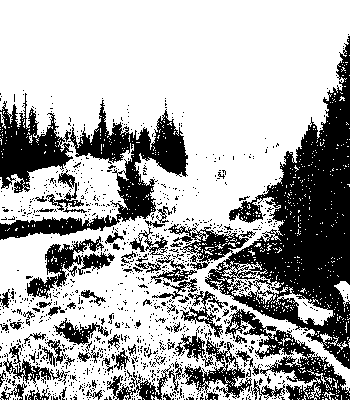

In [ ]:
binarize(gray2, 128, 255, 0)

# 2. Use thresholding approach to segment the image into 2,3,4,5…n clusters. Save the output image

In [ ]:
def binarize_2(image, threshold, num_1):
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(0,R):
    for j in range(0,C):
      if(image[i][j] < threshold and image[i][j] >= num_1):
        image_2[i][j] = num_1
  #cv2_imshow(image_2)
  return image_2

In [ ]:
def thresholding(image, n):
  if(n == 2):
    return(binarize(image, 128, 255, 0))
  n -= 1
  increment = (int) (255/n)
  for i in range(n):
    image = binarize_2(image, increment*(i+1), increment*i)
  cv2_imshow(image)
  print(image)
  return image

In [ ]:
gray

array([[ 74,  83,  81, ...,  69,  66,  67],
       [ 84,  87,  81, ...,  68,  66,  67],
       [ 88,  84,  77, ...,  65,  64,  65],
       ...,
       [ 37,  35,  32, ..., 127, 116, 107],
       [ 33,  33,  35, ..., 119, 114, 115],
       [ 33,  33,  36, ..., 117, 111, 113]], dtype=uint8)

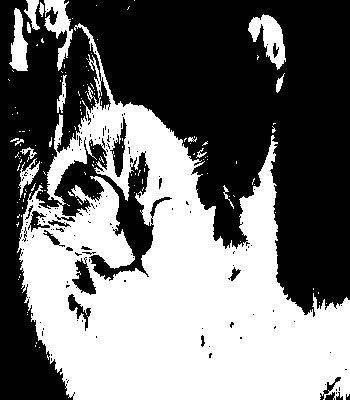

In [ ]:
thresholding(gray, 2)

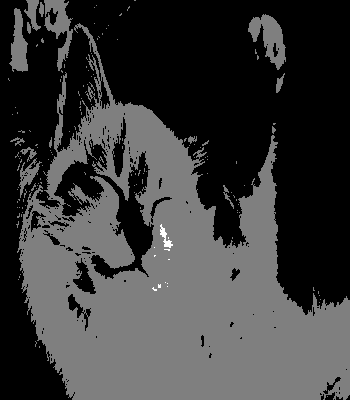

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 127   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 127,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
thresholding(gray, 3)

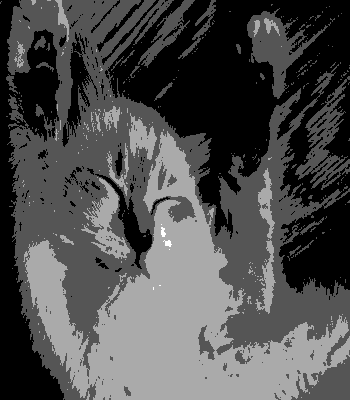

[[ 0  0  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [85  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 85 85 85]
 [ 0  0  0 ... 85 85 85]
 [ 0  0  0 ... 85 85 85]]


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 85,  0, ...,  0,  0,  0],
       [85,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 85, 85, 85],
       [ 0,  0,  0, ..., 85, 85, 85],
       [ 0,  0,  0, ..., 85, 85, 85]], dtype=uint8)

In [ ]:
thresholding(gray, 4)

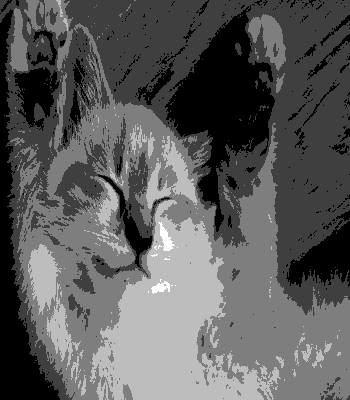

[[ 63  63  63 ...  63  63  63]
 [ 63  63  63 ...  63  63  63]
 [ 63  63  63 ...  63  63  63]
 ...
 [  0   0   0 ... 126  63  63]
 [  0   0   0 ...  63  63  63]
 [  0   0   0 ...  63  63  63]]


array([[ 63,  63,  63, ...,  63,  63,  63],
       [ 63,  63,  63, ...,  63,  63,  63],
       [ 63,  63,  63, ...,  63,  63,  63],
       ...,
       [  0,   0,   0, ..., 126,  63,  63],
       [  0,   0,   0, ...,  63,  63,  63],
       [  0,   0,   0, ...,  63,  63,  63]], dtype=uint8)

In [ ]:
thresholding(gray, 5)

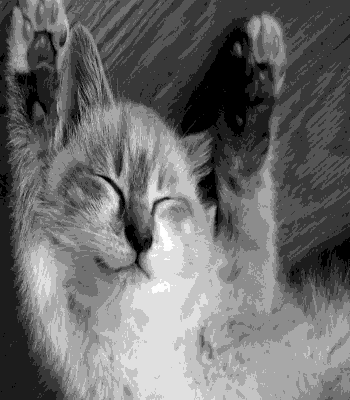

[[ 56  56  56 ...  56  56  56]
 [ 84  84  56 ...  56  56  56]
 [ 84  84  56 ...  56  56  56]
 ...
 [ 28  28  28 ... 112 112  84]
 [ 28  28  28 ... 112 112 112]
 [ 28  28  28 ... 112  84 112]]


array([[ 56,  56,  56, ...,  56,  56,  56],
       [ 84,  84,  56, ...,  56,  56,  56],
       [ 84,  84,  56, ...,  56,  56,  56],
       ...,
       [ 28,  28,  28, ..., 112, 112,  84],
       [ 28,  28,  28, ..., 112, 112, 112],
       [ 28,  28,  28, ..., 112,  84, 112]], dtype=uint8)

In [ ]:
thresholding(gray, 10)

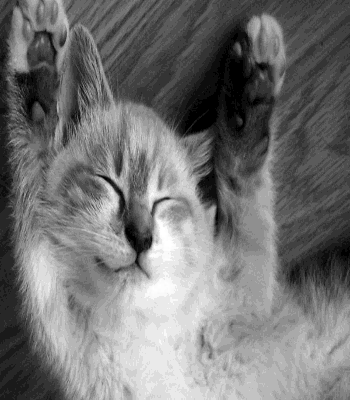

[[ 65  78  78 ...  65  65  65]
 [ 78  78  78 ...  65  65  65]
 [ 78  78  65 ...  65  52  65]
 ...
 [ 26  26  26 ... 117 104 104]
 [ 26  26  26 ... 117 104 104]
 [ 26  26  26 ... 117 104 104]]


array([[ 65,  78,  78, ...,  65,  65,  65],
       [ 78,  78,  78, ...,  65,  65,  65],
       [ 78,  78,  65, ...,  65,  52,  65],
       ...,
       [ 26,  26,  26, ..., 117, 104, 104],
       [ 26,  26,  26, ..., 117, 104, 104],
       [ 26,  26,  26, ..., 117, 104, 104]], dtype=uint8)

In [ ]:
thresholding(gray, 20)

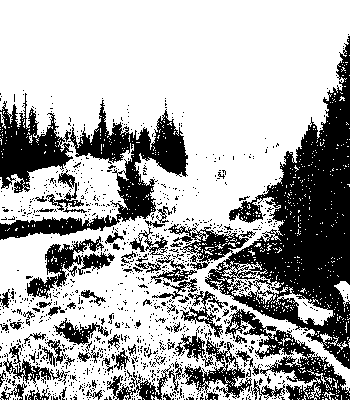

In [ ]:
thresholding(gray2, 2)

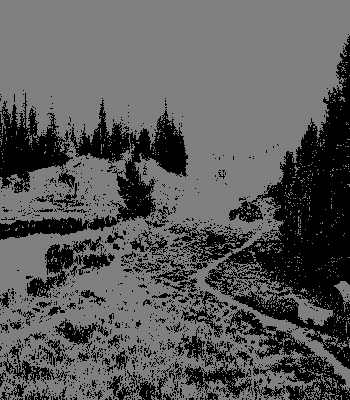

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127   0   0 ...   0   0   0]
 [  0 127 127 ...   0   0   0]
 [127   0 127 ...   0 127   0]]


array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127,   0,   0, ...,   0,   0,   0],
       [  0, 127, 127, ...,   0,   0,   0],
       [127,   0, 127, ...,   0, 127,   0]], dtype=uint8)

In [ ]:
thresholding(gray2, 3)

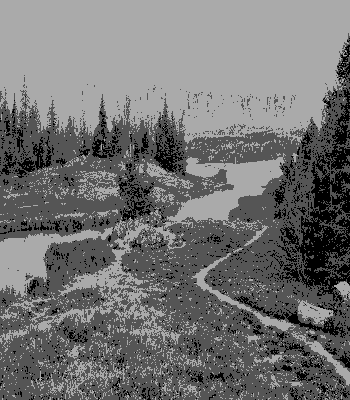

[[170 170 170 ... 170 170 170]
 [170 170 170 ... 170 170 170]
 [170 170 170 ... 170 170 170]
 ...
 [ 85  85  85 ...   0  85  85]
 [ 85  85 170 ...  85  85  85]
 [ 85  85 170 ...  85  85  85]]


array([[170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       ...,
       [ 85,  85,  85, ...,   0,  85,  85],
       [ 85,  85, 170, ...,  85,  85,  85],
       [ 85,  85, 170, ...,  85,  85,  85]], dtype=uint8)

In [ ]:
thresholding(gray2, 4)

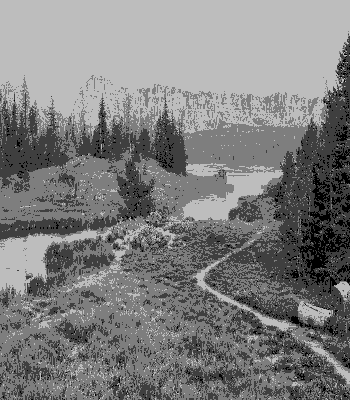

[[189 189 189 ... 189 189 189]
 [189 189 189 ... 189 189 189]
 [189 189 189 ... 189 189 189]
 ...
 [126  63  63 ...   0  63  63]
 [ 63 126 126 ...  63  63  63]
 [126  63 126 ...  63 126  63]]


array([[189, 189, 189, ..., 189, 189, 189],
       [189, 189, 189, ..., 189, 189, 189],
       [189, 189, 189, ..., 189, 189, 189],
       ...,
       [126,  63,  63, ...,   0,  63,  63],
       [ 63, 126, 126, ...,  63,  63,  63],
       [126,  63, 126, ...,  63, 126,  63]], dtype=uint8)

In [ ]:
thresholding(gray2, 5)

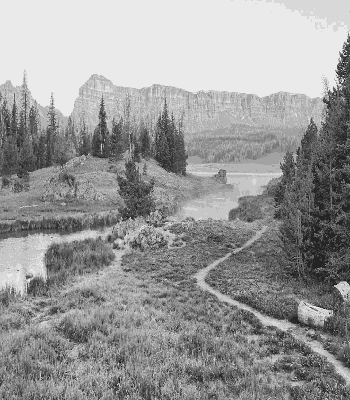

[[234 234 234 ... 216 216 216]
 [234 234 234 ... 216 216 216]
 [234 234 234 ... 216 216 216]
 ...
 [144 108  90 ...  54  90 108]
 [108 144 162 ... 108  90  90]
 [144  90 180 ... 108 144  72]]


array([[234, 234, 234, ..., 216, 216, 216],
       [234, 234, 234, ..., 216, 216, 216],
       [234, 234, 234, ..., 216, 216, 216],
       ...,
       [144, 108,  90, ...,  54,  90, 108],
       [108, 144, 162, ..., 108,  90,  90],
       [144,  90, 180, ..., 108, 144,  72]], dtype=uint8)

In [ ]:
thresholding(gray2, 15)

### Using image thresholding opencv function

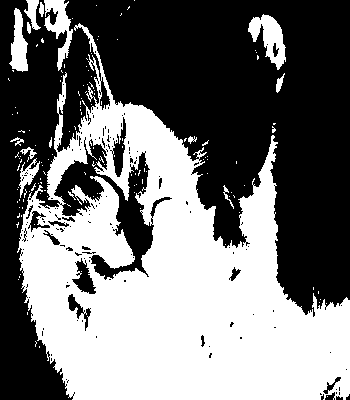

In [ ]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

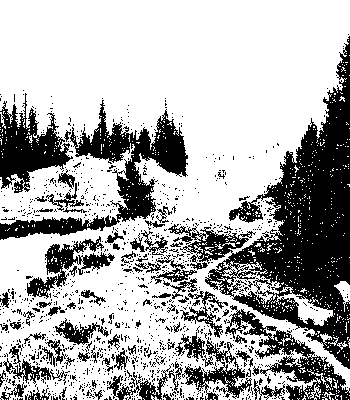

In [ ]:
ret,thresh1 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

# NOT FOR CURRENT SUBMISSION 3. Use block based segmentation to identify the homogenous regions. Save the output image


In [ ]:
from skimage.segmentation import slic

In [ ]:
im2 = slic(gray, compactness=20, n_segments=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


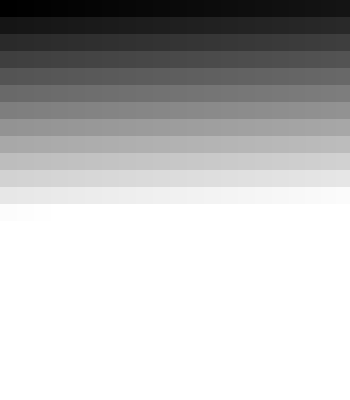

In [ ]:
cv2_imshow(im2)

In [ ]:
im2 = slic(gray2, compactness=20, n_segments=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


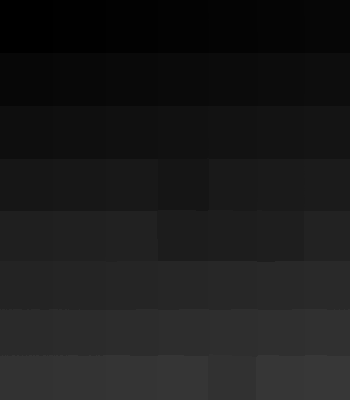

In [ ]:
cv2_imshow(im2)